# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import set_config
import pickle
from sklearn .tree import DecisionTreeRegressor
from sklearn import tree


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [2]:


raw_data = pd.read_csv("https://raw.githubusercontent.com/Defcon27/Data-Analysis-of-Indian-Automobile-dataset-using-Machine-Learning-in-R/master/indian-auto-mpg.csv")

## Loading the raw data


In [3]:
raw_data.head(5)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


## Preprocessing and Determining the variables of interest

In [4]:
raw_data = raw_data.drop(['Unnamed: 0','Name'],axis=1)

In [5]:
raw_data

,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,1248,74.00,5,28.40,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,1120,71.00,5,24.40,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,2498,112.00,8,14.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,998,67.10,5,18.90,2.65


In [6]:
raw_data.describe()

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,1621.606695,112.599819,5.278828,18.179408,9.501647
std,3.247238,9.155851e+04,601.036987,53.659495,0.808959,4.521801,11.205736
min,1998.000000,1.710000e+02,624.000000,34.200000,0.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,21.100000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,33.540000,160.000000


In [7]:
raw_data['Manufacturer'].value_counts()

Maruti          1197
Hyundai         1100
Honda            601
Toyota           409
MercedesBenz     318
Volkswagen       315
Ford             298
Mahindra         271
BMW              262
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              57
Jaguar            40
Mitsubishi        27
Mini              26
Fiat              25
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Force              3
ISUZU              2
Smart              1
Ambassador         1
Isuzu              1
Bentley            1
Lamborghini        1
Name: Manufacturer, dtype: int64

### Removing Manufacturers which have less than 10 cars

In [8]:
counts = raw_data.Manufacturer.value_counts()

raw_data = raw_data[raw_data.Manufacturer.isin(counts[counts > 3].index)]

In [9]:
raw_data['Manufacturer'].value_counts()

Maruti          1197
Hyundai         1100
Honda            601
Toyota           409
MercedesBenz     318
Volkswagen       315
Ford             298
Mahindra         271
BMW              262
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              57
Jaguar            40
Mitsubishi        27
Mini              26
Fiat              25
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Name: Manufacturer, dtype: int64

### Dealing with missing values


In [10]:
raw_data.isnull().sum()

Manufacturer         0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine CC            0
Power                0
Seats                0
Mileage Km/L         0
Price                0
dtype: int64

## Working on Numeric Columns

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


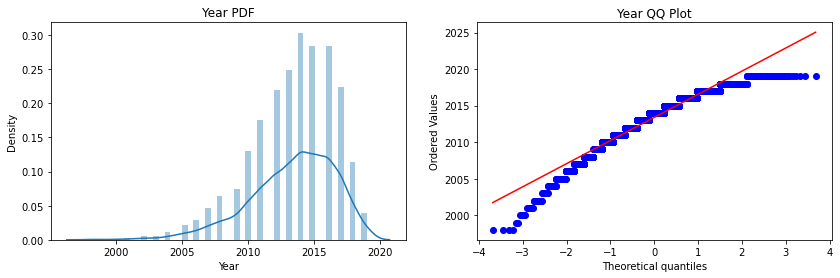

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Year'])
plt.title('Year PDF')
plt.subplot(122)
stats.probplot(raw_data['Year'], dist="norm", plot=plt)
plt.title('Year QQ Plot')
plt.show()

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


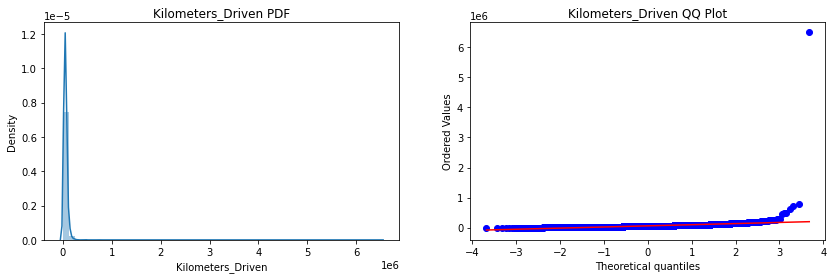

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Kilometers_Driven'])
plt.title('Kilometers_Driven PDF')
plt.subplot(122)
stats.probplot(raw_data['Kilometers_Driven'], dist="norm", plot=plt)
plt.title('Kilometers_Driven QQ Plot')
plt.show()

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


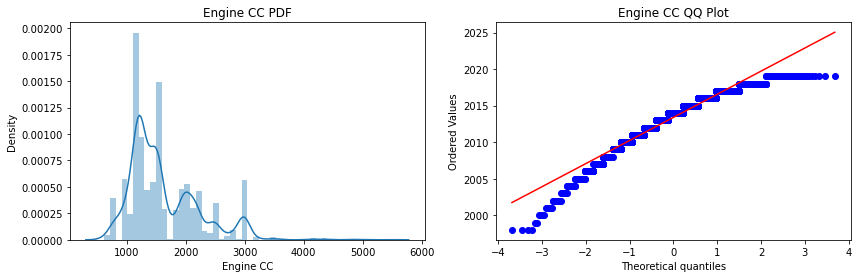

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Engine CC'])
plt.title('Engine CC PDF')
plt.subplot(122)
stats.probplot(raw_data['Year'], dist="norm", plot=plt)
plt.title('Engine CC QQ Plot')
plt.show()

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


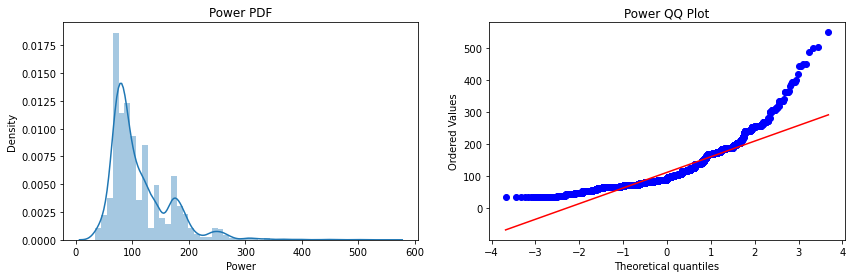

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Power'])
plt.title('Power PDF')
plt.subplot(122)
stats.probplot(raw_data['Power'], dist="norm", plot=plt)
plt.title('Power QQ Plot')
plt.show()

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


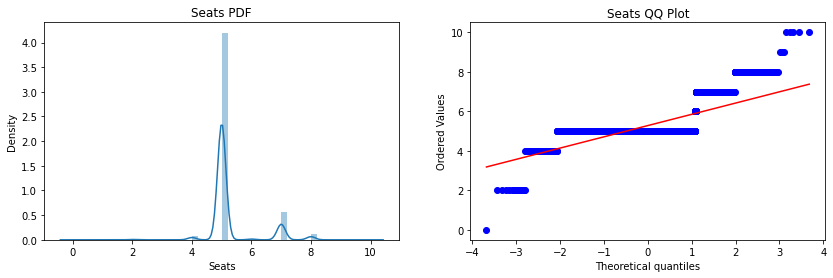

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Seats'])
plt.title('Seats PDF')
plt.subplot(122)
stats.probplot(raw_data['Seats'], dist="norm", plot=plt)
plt.title('Seats QQ Plot')
plt.show()

F:\installations\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


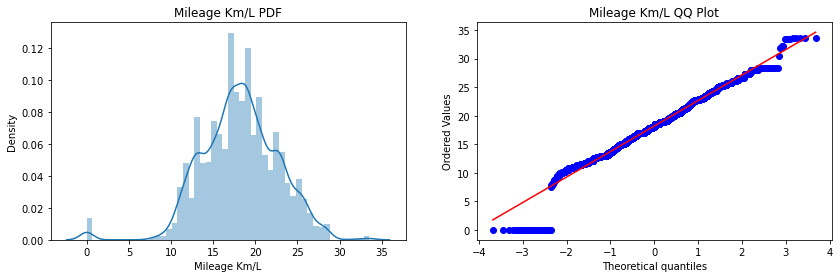

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Mileage Km/L'])
plt.title('Mileage Km/L PDF')
plt.subplot(122)
stats.probplot(raw_data['Mileage Km/L'], dist="norm", plot=plt)
plt.title('Mileage Km/L QQ Plot')
plt.show()

Text(0.5, 1.0, 'Price and Mileage Km/L')

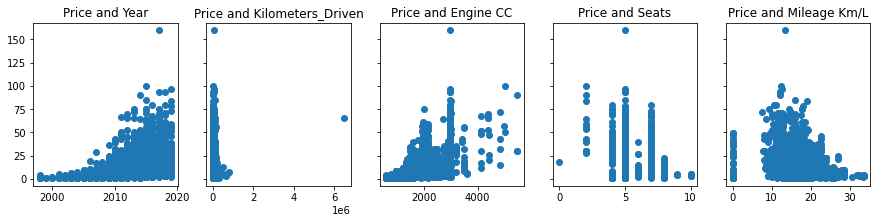

In [17]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw_data['Year'],raw_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(raw_data['Kilometers_Driven'],raw_data['Price'])
ax2.set_title('Price and Kilometers_Driven')
ax3.scatter(raw_data['Engine CC'],raw_data['Price'])
ax3.set_title('Price and Engine CC')
ax4.scatter(raw_data['Seats'],raw_data['Price'])
ax4.set_title('Price and Seats')
ax5.scatter(raw_data['Mileage Km/L'],raw_data['Price'])
ax5.set_title('Price and Mileage Km/L')

In [18]:
log_price = np.log(raw_data['Price'])

# Then we add it to our data frame
raw_data['log_price'] = log_price

C:\Users\Dell\AppData\Local\Temp\ipykernel_20648\1383285758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['log_price'] = log_price


Text(0.5, 1.0, 'Price and Mileage Km/L')

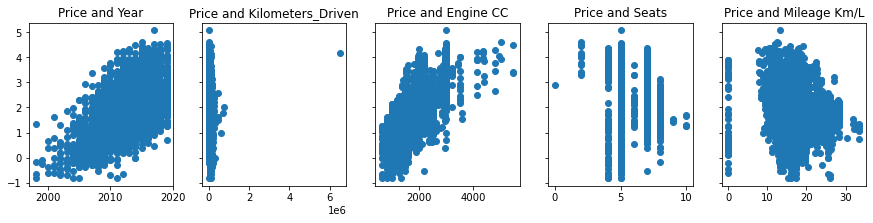

In [19]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw_data['Year'],raw_data['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(raw_data['Kilometers_Driven'],raw_data['log_price'])
ax2.set_title('Price and Kilometers_Driven')
ax3.scatter(raw_data['Engine CC'],raw_data['log_price'])
ax3.set_title('Price and Engine CC')
ax4.scatter(raw_data['Seats'],raw_data['log_price'])
ax4.set_title('Price and Seats')
ax5.scatter(raw_data['Mileage Km/L'],raw_data['log_price'])
ax5.set_title('Price and Mileage Km/L')

## Multicolinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
variables = raw_data[['Mileage Km/L','Year','Engine CC','Kilometers_Driven','Seats']]

In [22]:
vif = pd.DataFrame()

In [23]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]


In [24]:
vif["Features"] = variables.columns

In [25]:
vif

,VIF,Features
0,27.477438,Mileage Km/L
1,104.419314,Year
2,14.277432,Engine CC
3,1.426367,Kilometers_Driven
4,53.130509,Seats


In [26]:
raw_data = raw_data.drop(['log_price'],axis=1)

## Since not following Assumptions of Linear Rigression, We cannot apply it

## checking for Outliers

In [27]:
#Since most of the numerical columns are skewed therefore using IQR method

Q1 = raw_data.quantile(0.25)
Q3 = raw_data.quantile(0.75)
IQR = Q3 - Q1
((raw_data < (Q1 - 1.5 * IQR)) | (raw_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20648\923624275.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((raw_data < (Q1 - 1.5 * IQR)) | (raw_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             59
Fuel_Type              0
Kilometers_Driven    201
Location               0
Manufacturer           0
Mileage Km/L          69
Owner_Type             0
Power                236
Price                713
Seats                956
Transmission           0
Year                 129
dtype: int64

### Since Engine CC , Kilometers_Driven,Mileage Km/L,Year is less than 250 which is less than 0.05% .
### Therefore Trimming it

In [28]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
clean_data = raw_data.copy()
columns  = ['Kilometers_Driven','Power']
for column in columns:
    clean_data = remove_outlier(clean_data,column)

In [30]:
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1
((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20648\2591590570.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             18
Fuel_Type              0
Kilometers_Driven     36
Location               0
Manufacturer           0
Mileage Km/L          61
Owner_Type             0
Power                 49
Price                636
Seats                772
Transmission           0
Year                 113
dtype: int64

### Capping Seats Column

In [31]:
upper_limit =  clean_data['Seats'].quantile(0.75)
lower_limit = clean_data['Seats'].quantile(0.25)
#new_df_cap = df.copy()
clean_data['Seats'] = np.where(
    clean_data['Seats'] > upper_limit,
    upper_limit,
    np.where(
        clean_data['Seats'] < lower_limit,
        lower_limit,
        clean_data['Seats']
    )
)

In [32]:
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1
((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20648\2591590570.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             18
Fuel_Type              0
Kilometers_Driven     36
Location               0
Manufacturer           0
Mileage Km/L          61
Owner_Type             0
Power                 49
Price                636
Seats                  0
Transmission           0
Year                 113
dtype: int64

### Segregating Dependent and Independent Features

## Splitting data into train and test split

In [33]:
x=clean_data.drop(['Price'],axis=1)
y=clean_data.Price

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
#Taking data for decision tree
x_train_decision = x_train.copy()
x_test_decision = x_test.copy()
y_train_decision = y_train.copy()
y_test_decision = y_test.copy()

In [36]:
x_train

,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L
1843,Maruti,Mumbai,2014,53000,Petrol,Automatic,First,998,67.04,5.0,23.10
1862,Chevrolet,Mumbai,2010,78563,Diesel,Manual,First,1991,123.70,5.0,16.52
2182,Maruti,Mumbai,2011,14000,Petrol,Manual,Second,1197,85.80,5.0,17.50
2309,Tata,Pune,2011,50000,Petrol,Manual,Second,624,37.48,5.0,23.90
5349,BMW,Pune,2013,98000,Diesel,Automatic,First,1995,190.00,5.0,18.56
...,...,...,...,...,...,...,...,...,...,...,...
4067,Maruti,Delhi,2012,82069,CNG,Manual,First,1586,103.30,5.0,21.40
5608,Skoda,Bangalore,2013,66700,Petrol,Manual,First,1598,103.50,5.0,15.00
5643,MercedesBenz,Chennai,2007,70000,Diesel,Automatic,First,2987,198.50,5.0,11.00
5822,Maruti,Pune,2014,84000,Diesel,Manual,First,1248,74.00,5.0,22.90


In [37]:
x_train['Engine CC'].unique()

array([ 998, 1991, 1197,  624, 1995, 1599, 1598, 1497, 1591, 1120,  814,
       1196, 1461,  796, 1248, 1498, 1198, 1968, 1586, 2497, 2143, 1199,
       1396, 1998, 2179, 1298, 2499, 1399, 1798, 2477, 1582, 2148, 2696,
       1299, 2354, 2755, 1086, 1590, 1896, 1061, 1499, 1364, 1999, 1796,
       1194, 2987, 2494, 1493, 1405, 1495, 2393, 2498, 1997, 1373, 2694,
       1172, 2199, 1799, 1186, 2982,  993, 2993,  799, 1496, 1595,  970,
       1193, 1388,  999, 1978, 1797, 1984,  936, 2523, 2496, 1341, 3198,
       1950, 2489, 1956, 1390, 1596, 1047, 2698, 1150, 1343, 2198, 1468,
       1462, 2360, 1794, 1368, 2609, 2400, 2953, 1395, 3197, 2997, 2835,
       2720, 2359, 1597, 2495, 1985,  995, 2487, 1969, 2956, 2773, 2362,
       3436, 1242,  793, 2349, 2112, 1781, 2446, 2147, 1948, 2771, 1422],
      dtype=int64)

In [38]:
# one hot encoding
trf1 = ColumnTransformer(transformers=[
('ohe_Manufacturer' ,OneHotEncoder(sparse=False,handle_unknown='ignore'),[0]),
('ohe_Location' ,OneHotEncoder(sparse=False,handle_unknown='ignore'),[1]),
('ohe_Fuel_Type' ,OneHotEncoder(sparse=False,handle_unknown='ignore'),[1]),
('ohe_Transmission' ,OrdinalEncoder(categories=[['Manual', 'Automatic']]),[5]),
('ohe_Owner_Type' ,OrdinalEncoder(categories=[['Fourth', 'Third','Second','First']]),[6]), 
],remainder='passthrough')

In [39]:
# Scaling
trf2 = ColumnTransformer([
('scale_Year',StandardScaler(),[2]),
('scale_Kilometers_Driven',StandardScaler(),[3]),
('Engine CC',StandardScaler(),[7]),
('Power',StandardScaler(),[8]),    
])

In [40]:
# Feature selection
trf3 = SelectKBest(score_func=chi2,k=5)

In [41]:
x_train = trf1.fit_transform(x_train)

In [42]:
x_train=trf2.fit_transform(x_train)

In [43]:
x_test =trf1.transform(x_test)

In [44]:
x_test = trf2.transform(x_test)

In [45]:
# train the model
trf8 = KNeighborsRegressor()

In [46]:
trf9 = DecisionTreeRegressor()

In [47]:
pipe = make_pipeline(trf1,trf2,trf8)

In [48]:
pipe_decision_tree = make_pipeline(trf1,trf2,trf9)

In [49]:
pipe.fit(x_train,y_train)

ValueError: all features must be in [0, 3] or [-4, 0]

In [ ]:
pipe.named_steps

In [ ]:
#pipe.named_steps['trf1'].transformers_

In [ ]:
from sklearn  import set_config
set_config(display='diagram')

In [ ]:
y_predict_train = pipe.predict(x_train)

In [ ]:
#MAE
np.mean(np.abs(y_train - y_predict_train))

In [ ]:
#MSE
np.mean((y_train - y_predict_train)**2)

In [ ]:
np.sqrt(np.mean((y_train - y_predict_train)**2))

In [ ]:
#MAPE
np.mean(np.abs(y_train - y_predict_train)/y_train)*100

### Test accuracy

In [ ]:
# Predict
y_pred = pipe.predict(x_test)

In [ ]:
#MAE
np.mean(np.abs(y_test - y_pred))

In [ ]:
#MSE
np.mean((y_test - y_pred)**2)

In [ ]:
np.sqrt(np.mean((y_test - y_pred)**2))

In [ ]:
#MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

In [ ]:
#cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()

In [ ]:
# gridsearchcv
params = {
'trf4_max_depth': [1,2,3,4,5,None] }

In [ ]:
params={'n_neighbors': [1,2,3,4,5]}

In [ ]:
grid = GridSearchCV(pipe, params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:

pickle.dump(pipe,open('pipe.pkl",'wb'))

In [ ]:
pipe = pickle.load(open("pipe.pk1','rb'))

In [ ]:
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 's'],dtype=object).reshape(1,7)

In [ ]:
pipe.predict(test_input2)

In [65]:
reg_tree = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
reg_tree.fit(x_train ,y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

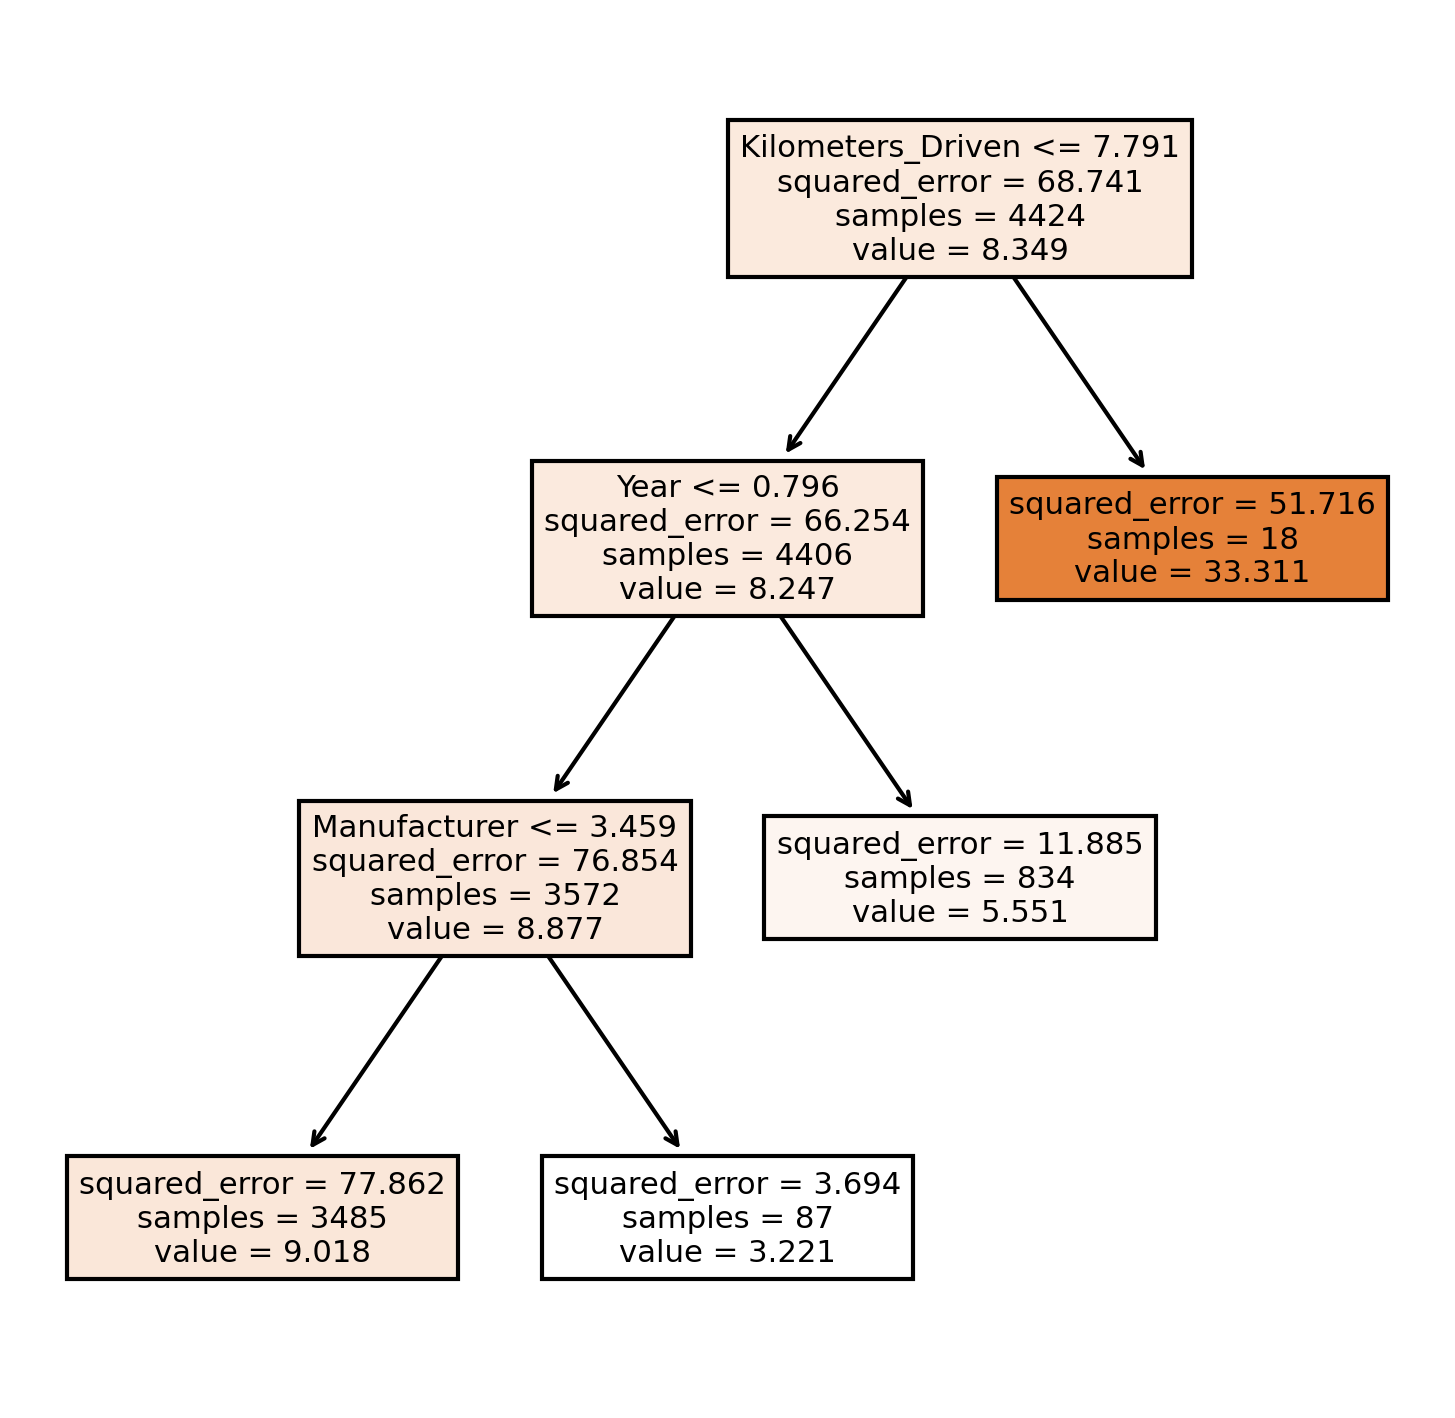

In [66]:
fig , axes = plt.subplots(figsize=(6,6), dpi=300)
tree.plot_tree(reg_tree , feature_names = list(x),filled = True)
plt.show()


In [67]:
y_predict_train = reg_tree.predict(x_train)
y_predict_train

array([9.01828121, 3.22149425, 9.01828121, ..., 9.01828121, 9.01828121,
       9.01828121])

In [68]:
#MAE
np.mean(np.abs(y_train - y_predict_train))

5.402373554154247

In [69]:
#MSE
np.mean((y_train - y_predict_train)**2)

63.85923208524829

In [70]:
params = {
'max_depth': [1,2,3,4,5,6,7,8,9,10,11,None],
'max_features' : [1,2,3,None],
'min_samples_split' : [1,2,3,4,5],
'min_samples_leaf' : [10,100,250,400]}

In [71]:
grid = GridSearchCV( DecisionTreeRegressor(), params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

F:\installations\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
384 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "F:\installations\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\installations\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "F:\installations\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
                         'max_features': [1, 2, 3, None],
                         'min_samples_leaf': [10, 100, 250, 400],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [72]:
grid.best_score_

0.04861639285611841

In [73]:
grid.best_params_

{'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [ ]:
Decision Tree

In [ ]:
reg_tree=pipe_decision_tree.fit(x_train,y_train)

In [ ]:
fig , axes = plt.subplots(figsize=(6,6), dpi=300)
tree.plot_tree(reg_tree , feature_names = list(clean_data),filled = True)
plt.show()

In [ ]:
#KNN

In [50]:
reg_knn = KNeighborsRegressor()

In [51]:
reg_knn.fit(x_train ,y_train)

KNeighborsRegressor()

In [52]:
y_predict_train = reg_knn.predict(x_train)
y_predict_train

array([10.85,  3.13, 10.85, ..., 10.85, 10.85, 10.85])

In [53]:
#MAE
np.mean(np.abs(y_train - y_predict_train))

6.069318716094031

In [55]:
#MSE
np.mean((y_train - y_predict_train)**2)

66.43605296654589

In [56]:
params = {
'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,None]}

In [57]:
grid = GridSearchCV( KNeighborsRegressor(), params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

F:\installations\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.15322499 -1.17658207 -0.37578055 -0.43992018 -0.18122481 -0.04313213
 -0.24946781 -0.15082505 -0.15340858 -0.118177   -0.11429794         nan]
  warnings.warn(


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         None]})

In [58]:
grid.best_score_

-0.043132130444945516

In [59]:
grid.best_params_

{'n_neighbors': 6}

In [60]:
reg_knn = KNeighborsRegressor(n_neighbors=6)

In [61]:
reg_knn.fit(x_train ,y_train)

KNeighborsRegressor(n_neighbors=6)

In [62]:
y_predict_train = reg_knn.predict(x_train)
y_predict_train

array([9.79166667, 2.95833333, 9.79166667, ..., 9.79166667, 9.79166667,
       9.79166667])

In [63]:
#MAE

np.mean(np.abs(y_train - y_predict_train))

5.648345388788425

In [64]:
#MSE
np.mean((y_train - y_predict_train)**2)

64.42903190802699